In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline 

## Upload dataset

In [ ]:
#C:\\Users\\ASUS\\Desktop\\shai-ml\\
train_data = pd.read_csv('train.csv')

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
test_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
# Drop the "Unnamed: 0" column
train_data = train_data.drop("Unnamed: 0", axis = 1)

# Price is int64, best if all numeric attributes have the same datatype, especially as float64
train_data["price"] = train_data["price"].astype(float)

# Preview dataset again
train_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47


In [ ]:
#Checking for duplicate records in the data
dups = train_data .duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(train_data .shape)

Number of duplicate rows = 127
(43040, 10)


In [ ]:
print('Before',train_data.shape)
train_data.drop_duplicates(inplace=True) 
print('After',train_data.shape)

Before (43040, 10)
After (42913, 10)


In [ ]:
train_data["cut"].value_counts()

Ideal        17370
Premium      10995
Very Good     9395
Good          3896
Fair          1257
Name: cut, dtype: int64

In [ ]:
train_data["color"].value_counts()

G    9057
E    7703
F    7509
H    6612
D    5535
I    4285
J    2212
Name: color, dtype: int64

In [ ]:
train_data["clarity"].value_counts()

SI1     10335
VS2      9955
SI2      7341
VS1      6467
VVS2     3949
VVS1     2830
IF       1480
I1        556
Name: clarity, dtype: int64

In [ ]:
train_data.describe()

,carat,depth,table,price,x,y,z
count,42913.000000,42913.000000,42913.000000,42913.000000,42913.000000,42913.000000,42913.000000
mean,0.796855,61.744490,57.440447,3943.509729,5.724621,5.728446,3.534453
std,0.480789,1.431742,2.239004,4022.173515,1.131302,1.158623,0.713821
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,941.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2392.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5312.000000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Analysis & Visualization

In [ ]:
corr_matrix = train_data.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.923745
x        0.887590
y        0.863727
z        0.860595
table    0.136313
depth   -0.014729
Name: price, dtype: float64

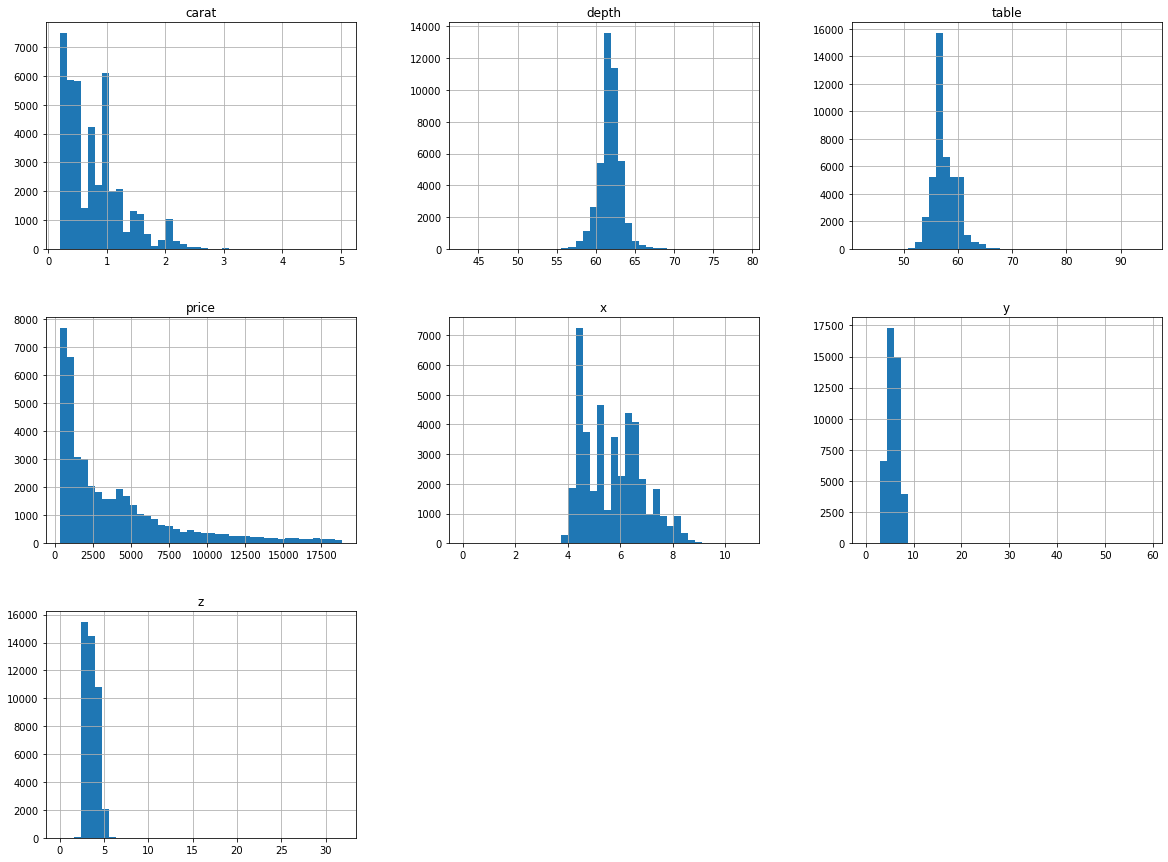

In [ ]:
train_data.hist(bins = 40, figsize = (20,15))
plt.show()

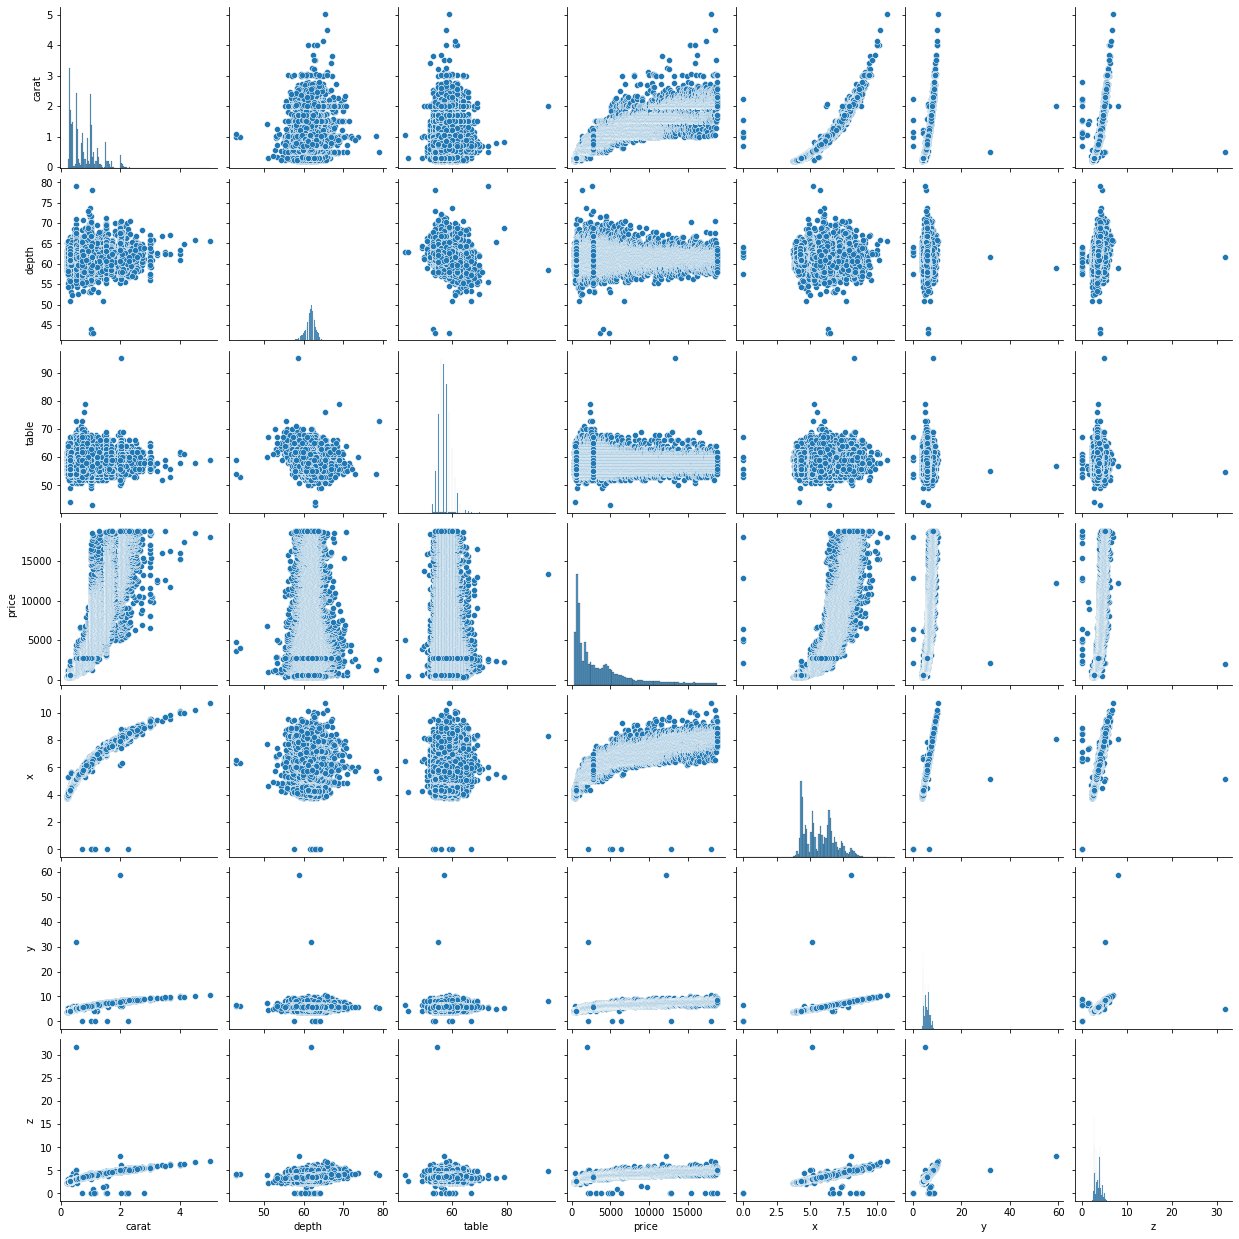

In [ ]:
ans =sns.pairplot(train_data)

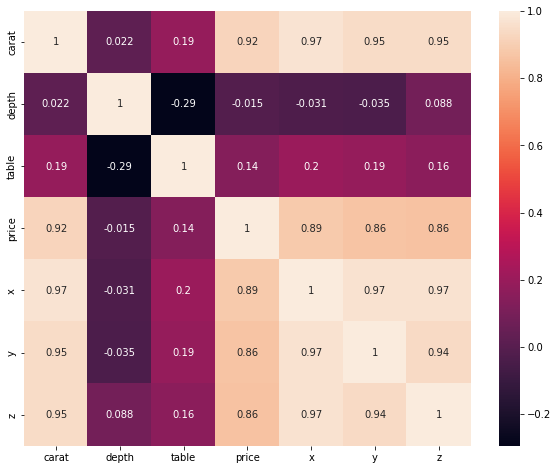

In [ ]:
# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


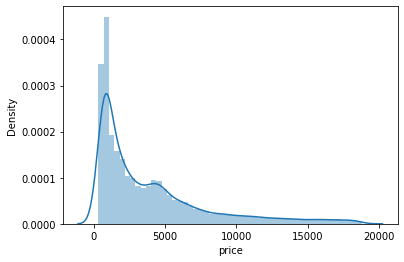

In [ ]:
sns.distplot(train_data.price)

In [ ]:
train_data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
print("Number of rows with x == 0: {} ".format((train_data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((train_data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((train_data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((train_data.depth==0).sum()))

Number of rows with x == 0: 6 
Number of rows with y == 0: 5 
Number of rows with z == 0: 16 
Number of rows with depth == 0: 0 


In [ ]:
train_data[['x','y','z']] = train_data[['x','y','z']].replace(0,np.NaN)

In [ ]:
train_data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           6
y           5
z          16
dtype: int64

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
train_data.shape

(42897, 10)

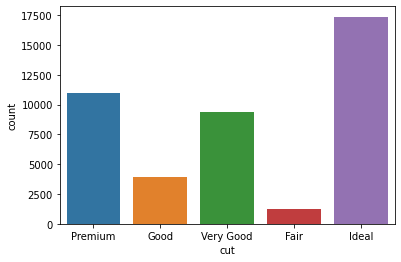

In [ ]:
ans = sns.countplot(data = train_data,x = 'cut')

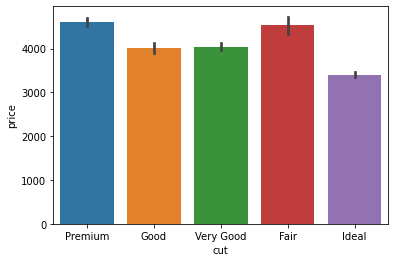

In [ ]:
ans = sns.barplot(data = train_data, x ='cut', y='price')

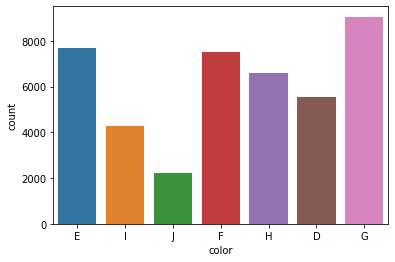

In [ ]:
ans = sns.countplot(data = train_data,x = 'color')

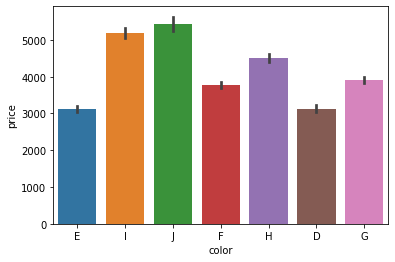

In [ ]:
ans = sns.barplot(data = train_data, x ='color', y='price')

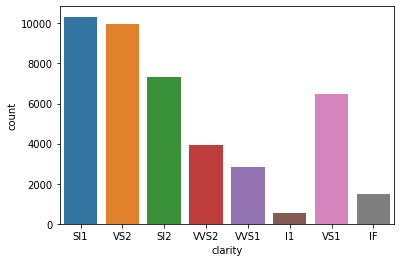

In [ ]:
ans = sns.countplot(data = train_data,x = 'clarity')

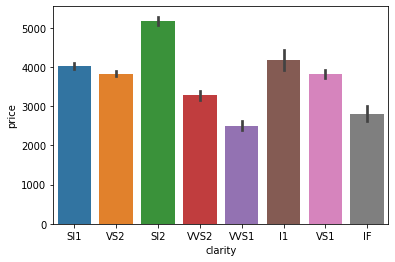

In [ ]:
ans = sns.barplot(data = train_data, x ='clarity', y='price')

In [ ]:
layout_options = {
    'paper_bgcolor':"#383838",
    'plot_bgcolor':'#383838',
    'title_font': dict(color='white'),
    'legend_font': dict(color='white'),
    'yaxis':dict(color="white"),
    'xaxis':dict(color="white")
    }

In [ ]:
fig = px.box(train_data, y='price', x='cut', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = px.box(train_data, y='price', x='color', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

In [ ]:
fig = px.box(train_data, y='price', x='clarity', width=600, height=400)
fig.update_layout(**layout_options)
fig.show()

## Feature Engineering

In [ ]:
train_data['space'] = train_data['x'] * train_data['y']
train_data['volume'] = train_data['x'] * train_data['y'] * train_data['z']

In [ ]:
corr_matrix = train_data.corr()
corr_matrix["price"].sort_values(ascending=False)

price     1.000000
carat     0.923702
space     0.902814
volume    0.902200
x         0.890126
z         0.867722
y         0.865836
table     0.136470
depth    -0.014855
Name: price, dtype: float64

In [ ]:
train_data.drop(['x','y','z'], axis = 1, inplace = True)
train_data.head()

,carat,cut,color,clarity,depth,table,price,space,volume
0,0.21,Premium,E,SI1,59.8,61.0,326.0,14.9376,34.505856
1,0.29,Premium,I,VS2,62.4,58.0,334.0,17.7660,46.724580
2,0.31,Good,J,SI2,63.3,58.0,335.0,18.8790,51.917250
3,0.24,Very Good,J,VVS2,62.8,57.0,336.0,15.6024,38.693952
4,0.24,Very Good,I,VVS1,62.3,57.0,336.0,15.7210,38.830870


##One hot Encoding

In [ ]:
one_hot_encoders_train_data =  pd.get_dummies(train_data)
cols = one_hot_encoders_train_data.columns
train_clean_data = pd.DataFrame(one_hot_encoders_train_data,columns= cols)
train_clean_data.head()

,carat,depth,table,price,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.21,59.8,61.0,326.0,14.9376,34.505856,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.29,62.4,58.0,334.0,17.7660,46.724580,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0.31,63.3,58.0,335.0,18.8790,51.917250,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0.24,62.8,57.0,336.0,15.6024,38.693952,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.24,62.3,57.0,336.0,15.7210,38.830870,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(train_clean_data[['carat','depth','table','space','volume']]),
                           columns=['carat','depth','table','space','volume'],
                           index=train_clean_data.index)


train_clean_data_standard = train_clean_data.copy(deep=True)
train_clean_data_standard[['carat','depth','table','space','volume']] = numericals[['carat','depth','table','space','volume']]
train_clean_data_standard.head()

,carat,depth,table,price,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.220742,-1.358565,1.590373,326.0,-1.398962,-1.194716,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.054251,0.457831,0.250134,334.0,-1.192073,-1.041451,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,-1.012628,1.086584,0.250134,335.0,-1.110661,-0.976316,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,-1.158308,0.737277,-0.196612,336.0,-1.350334,-1.142183,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,-1.158308,0.387970,-0.196612,336.0,-1.341659,-1.140466,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
X_train = train_clean_data_standard.drop(["price"],axis=1)
Y_train = train_clean_data_standard.price

In [ ]:
X_train.shape

(42897, 25)

### Preprocessing Test data

In [ ]:
test_data['space'] = test_data['x'] * test_data['y']
test_data['volume'] = test_data['x'] * test_data['y'] * test_data['z']
test_data.drop(['x','y','z'], axis = 1, inplace = True)

one_hot_encoders_test_data =  pd.get_dummies(test_data)
cols = one_hot_encoders_test_data.columns
test_clean_data = pd.DataFrame(one_hot_encoders_test_data,columns= cols)

numericals =  pd.DataFrame(sc_X.transform(test_clean_data[['carat','depth','table','space','volume']]),
                           columns=['carat','depth','table','space','volume'],
                           index=test_clean_data.index)

test_clean_data_standard = test_clean_data.copy(deep=True)
test_clean_data_standard[['carat','depth','table','space','volume']] = numericals[['carat','depth','table','space','volume']]
X_test = test_clean_data_standard
X_test.head()

,Unnamed: 0,carat,depth,table,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,-1.179119,-0.170922,-1.090105,-1.341659,-1.148353,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,3,-1.179119,-3.384546,3.377357,-1.285884,-1.149923,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,8,-1.116685,0.108524,-1.090105,-1.268022,-1.096686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,10,-1.179119,-1.638011,1.590373,-1.306622,-1.141881,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,12,-1.179119,0.737277,-0.643359,-1.370479,-1.154595,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
X_test.shape

(10900, 26)

### Train Model

In [ ]:
#CV = []
#R2_train = []
rmse_ = []
def evaluation_train(model):

  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_train)
  # MAE
  mae =mean_absolute_error(Y_train, Y_pred)
    
  # MSE
  lin_mse = mean_squared_error(Y_train, Y_pred)
  lin_rmse = np.sqrt(lin_mse)


  scores = cross_val_score(model, X_train, Y_train, scoring ="neg_mean_squared_error",cv = 10)
  rmse_scores = np.sqrt(-scores)

  return mae,lin_rmse,rmse_scores,rmse_scores.mean(),rmse_scores.std()

In [ ]:
def meansquarederror(y_pred, y_test):
    lin_mse = mean_squared_error(y_pred, y_test)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

#### Linear Regression Model

In [ ]:
X_train.shape

(42897, 25)

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)
#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_1)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

LinearRegression()

In [ ]:
y_pred=model_1.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

1106.6369654913747

#### Decision Tree Regressor Model

In [ ]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_2)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

DecisionTreeRegressor()

In [ ]:
y_pred=model_2.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

751.6097275577966

####  Random Forest Regressor Model

In [ ]:
model_3 = RandomForestRegressor()
model_3.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_3)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

RandomForestRegressor()

In [ ]:
y_pred=model_3.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

558.729808143182

####KNeighborsRegressor

In [ ]:
model_4 = KNeighborsRegressor(n_neighbors = 8)
model_4.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(model_4)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

KNeighborsRegressor(n_neighbors=8)

In [ ]:
y_pred=model_4.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

801.9757962442524

####Support Vector Machines

In [ ]:
rbf = SVR(kernel="rbf")
rbf.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(rbf)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

MAE:  3001.919450379363
MSE:  1459.123123005432
Scores:  [3029.5137252  3016.31026125 3061.03303837 3001.33762907 3060.56143809
 3081.76104241 3142.96834243 3262.1510635  2973.96386667 3023.27211765]
Mean:  3065.287252464403
Standard Deviation:  79.35666755051207


In [ ]:
y_pred=rbf.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

2948.7691461912955

In [ ]:
linear = SVR(kernel="linear")
linear.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

SVR(kernel='linear')

In [ ]:
y_pred=linear.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

1406.842293278012

#### Random Forest Regressor Hyperparameter tuning

In [ ]:
best_model = RandomForestRegressor(n_estimators=400,
                                  max_features='sqrt',
                                  )

best_model.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

RandomForestRegressor(max_features='sqrt', n_estimators=400)

In [ ]:
y_pred=best_model.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

565.765591033526

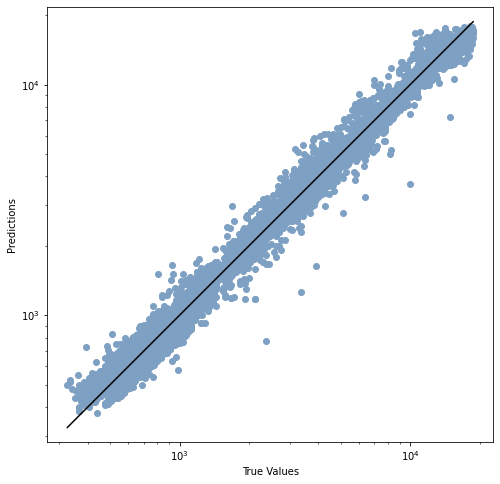

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(Y_test, y_pred, c="#7ea0c3")
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(Y_test))
p2 = min(min(y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], "k-")
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()

In [ ]:
model_7 = RandomForestRegressor(criterion= 'squared_error',max_depth= 8,max_features= 6,n_estimators= 500)
model_7.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

RandomForestRegressor(max_depth=8, max_features=6, n_estimators=500)

In [ ]:
y_pred=best_model.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

565.765591033526

#### Grid Search

In [ ]:
#params= {
  #  'n_estimators': [175,200,225],
   # 'max_features': ['auto', 'sqrt', 'log2']
#}

#grid = GridSearchCV(param_grid=params,estimator=best_model,cv=5)

In [ ]:
#grid.fit(X_train_scaled,y_train)

In [ ]:
#print(grid.best_estimator_)
#print(grid.best_params_)

In [ ]:
#rf = grid.best_estimator_

In [ ]:
#parameters = {
 #   'nthread':[x for x in range(1,4)], 
 #   'objective':['reg:squarederror'],
 #   'learning_rate': [.01,.03, 0.05], 
 #    'max_depth':[7],
 #   'n_estimators':[500]
 #}

In [ ]:
#Model=XGBRegressor()

In [ ]:
#grid_search = GridSearchCV(Model, parameters, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [ ]:
#grid_search.fit(X_train,Y_train)
#y_pred=grid_search.predict(X_test)
#meansquarederror(y_pred, Y_test)

507.8778839714363

In [ ]:
#print(grid_search.best_estimator_)
#print(grid_search.best_params_)

XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=500, nthread=1,
             objective='reg:squarederror')
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'nthread': 1, 'objective': 'reg:squarederror'}


#### Elastic Net Regression

In [ ]:
model_5 = ElasticNet()
model_5.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

ElasticNet()

In [ ]:
y_pred=model_5.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

#### AdaBoost Regression

In [ ]:
model_6 = AdaBoostRegressor(n_estimators = 100)
model_6.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

AdaBoostRegressor(n_estimators=100)

In [ ]:
y_pred=model_6.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

1454.861090670476

#### GradientBoosting Regression

In [ ]:
model_7 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1)
model_7.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

GradientBoostingRegressor(max_depth=1)

In [ ]:
y_pred=model_7.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

1192.526481389196

####XGBRegressor

In [ ]:
xgb_r = XGBRegressor()
xgb_r.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

[20:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred=xgb_r.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

718.7209175096459

In [ ]:
model_8=XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.03,max_depth= 7,min_child_weight= 5,n_estimators= 500,nthread= 1,objective= 'reg:squarederror',subsample= 0.7)
model_8.fit(X_train,Y_train)

#mse,lin_rmse,rmse_scores,rmse_scores_mean,rmse_scores_std =evaluation_train(linear)
#print("MAE: ",lin_rmse)
#print("MSE: ",mse)
#print("Scores: ", rmse_scores)
#print("Mean: ", rmse_scores_mean)
#print("Standard Deviation: ", rmse_scores_std)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=7,
             min_child_weight=5, n_estimators=500, nthread=1,
             objective='reg:squarederror', subsample=0.7)

In [ ]:
y_pred=model_8.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

539.9607094687161

In [ ]:
model_9=XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.01,max_depth= 7,min_child_weight= 5,n_estimators= 500,nthread= 1,objective= 'reg:squarederror',subsample= 0.7)
model_9.fit(X_train,Y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=7,
             min_child_weight=5, n_estimators=500, nthread=1,
             objective='reg:squarederror', subsample=0.7)

In [ ]:
y_pred=model_9.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

539.9607094687161

In [ ]:
model_10=XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=500, nthread=1,
             objective='reg:squarederror')
model_10.fit(X_train,Y_train)

XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=500, nthread=1,
             objective='reg:squarederror')

In [ ]:
y_pred=model_10.predict(X_test)
rmse_.append(meansquarederror(y_pred, Y_test))
meansquarederror(y_pred, Y_test)

507.8778839714363

In [ ]:
X_testing = X_test.drop('Unnamed: 0',axis = 1)
id_test = X_test['Unnamed: 0'].copy()


final_predictions = model_10.predict(X_testing)
final_predictions

prediction = pd.Series(final_predictions)
data = { 'Unnamed: 0': id_test, 'price': prediction }
pred = pd.DataFrame(data)
pred.to_csv('submissions.csv', index=False)

In [ ]:
pred

,Unnamed: 0,price
0,1,339.657013
1,3,434.938782
2,8,357.304565
3,10,312.899841
4,12,275.825989
...,...,...
10895,53922,2514.214111
10896,53923,2922.900391
10897,53933,2898.440674
10898,53934,2776.576904
